In [1]:
from dask_yarn import YarnCluster
from dask.distributed import Client
cluster = YarnCluster()
client = Client(cluster)
client

distributed.scheduler - INFO - Clear task state
distributed.scheduler - INFO -   Scheduler at:  tcp://172.31.69.30:42443
distributed.scheduler - INFO -   dashboard at:                    :38055
distributed.scheduler - INFO - Receive client connection: Client-07c3d526-8e09-11ea-a6a8-163bb3a0545d
distributed.core - INFO - Starting established connection


Client Scheduler: tcp://172.31.69.30:42443 Dashboard: /proxy/38055/status,Cluster Workers: 0 Cores: 0 Memory: 0 B


In [2]:
import ipywidgets
cluster

In [3]:
cluster.scale(8)

In [4]:
import dask
import dask.dataframe as dd

In [5]:
# read the data
df = dd.read_parquet("s3://finalproject502/df.parquet")

distributed.scheduler - INFO - Register worker <Worker 'tcp://172.31.75.250:37597', name: dask.worker_2, memory: 0, processing: 0>
distributed.scheduler - INFO - Starting worker compute stream, tcp://172.31.75.250:37597
distributed.core - INFO - Starting established connection
distributed.scheduler - INFO - Register worker <Worker 'tcp://172.31.73.62:45309', name: dask.worker_3, memory: 0, processing: 0>
distributed.scheduler - INFO - Starting worker compute stream, tcp://172.31.73.62:45309
distributed.core - INFO - Starting established connection
distributed.scheduler - INFO - Register worker <Worker 'tcp://172.31.75.189:34161', name: dask.worker_0, memory: 0, processing: 0>
distributed.scheduler - INFO - Starting worker compute stream, tcp://172.31.75.189:34161
distributed.core - INFO - Starting established connection
distributed.scheduler - INFO - Register worker <Worker 'tcp://172.31.75.189:42875', name: dask.worker_6, memory: 0, processing: 0>
distributed.scheduler - INFO - Starti

In [6]:
df

,GLOBALEVENTID,SQLDATE,MonthYear,Year,FractionDate,Actor1Code,Actor1Name,Actor1CountryCode,Actor1KnownGroupCode,Actor1EthnicCode,Actor1Religion1Code,Actor1Religion2Code,Actor1Type1Code,Actor1Type2Code,Actor1Type3Code,Actor2Code,Actor2Name,Actor2CountryCode,Actor2KnownGroupCode,Actor2EthnicCode,Actor2Religion1Code,Actor2Religion2Code,Actor2Type1Code,Actor2Type2Code,Actor2Type3Code,IsRootEvent,EventCode,EventBaseCode,EventRootCode,QuadClass,GoldsteinScale,NumMentions,NumSources,NumArticles,AvgTone,Actor1Geo_Type,Actor1Geo_FullName,Actor1Geo_CountryCode,Actor1Geo_ADM1Code,Actor1Geo_Lat,Actor1Geo_Long,Actor1Geo_FeatureID,Actor2Geo_Type,Actor2Geo_FullName,Actor2Geo_CountryCode,Actor2Geo_ADM1Code,Actor2Geo_Lat,Actor2Geo_Long,Actor2Geo_FeatureID,ActionGeo_Type,ActionGeo_FullName,ActionGeo_CountryCode,ActionGeo_ADM1Code,ActionGeo_Lat,ActionGeo_Long,ActionGeo_FeatureID,DATEADDED,SOURCEURL
npartitions=610,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,object,datetime64[ns],object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,float32,int32,int32,int32,float32,object,object,object,object,float32,float32,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

network between Chinese and Anmerican actors

In [8]:
# take columns of Actor1Name and Actor2Name, and drop null values
ddf1 = df.iloc[:,[6, 7, 16, 17]]
ddf1 = ddf1[(ddf1.Actor1Name != "CHINA") & (ddf1.Actor1Name != "") & (ddf1.Actor2Name != "UNITED STATES") & (ddf1.Actor2Name != "THE US") & (ddf1.Actor2Name != "") & \
            (ddf1.Actor2Name != "A US") & (ddf1.Actor1CountryCode == "CHN") & (ddf1.Actor2CountryCode == "USA")]
ddf1

,Actor1Name,Actor1CountryCode,Actor2Name,Actor2CountryCode
npartitions=610,,,,
,object,object,object,object
,...,...,...,...
...,...,...,...,...
,...,...,...,...
,...,...,...,...


In [9]:
len(ddf1)

20292

In [10]:
# get Actor1Name of top 10 appearance
ddf1.Actor1Name.value_counts().head(10)

CHINESE                        11579
BEIJING                         3573
CANTON                          1018
XI JINPING                       879
SHANGHAI                         843
HANGZHOU                         446
NANJING                          136
TIBET                            133
SHENZHEN                         104
YINGLI GREEN ENERGY HOLDING       99
Name: Actor1Name, dtype: int64

In [11]:
# Make a list of top 10 ActorName
A1 = ['CHINESE', 'BEIJING', 'CANTON', 'XI JINPING', 'SHANGHAI', 'HANGZHOU', 'TIBET', 'NANJING', 'SHENZHEN', 'YINGLI GREEN ENERGY HOLDING']

In [12]:
pddf1 = ddf1[(ddf1.Actor1Name == 'CHINESE') | (ddf1.Actor1Name == 'BEIJING') | (ddf1.Actor1Name == 'CANTON') | (ddf1.Actor1Name == 'XI JINPING') | \
             (ddf1.Actor1Name == 'SHANGHAI') | (ddf1.Actor1Name == 'HANGZHOU') | (ddf1.Actor1Name == 'TIBET') | (ddf1.Actor1Name == 'NANJING') | \
             (ddf1.Actor1Name == 'SHENZHEN') | (ddf1.Actor1Name == 'YINGLI GREEN ENERGY HOLDING')]

In [13]:
a = pddf1.Actor2Name.value_counts().head(50).axes
alist = []
for i in range(50):
    alist.append(a[0][i])
alist

['WASHINGTON',
 'AMERICAN',
 'OBAMA',
 'BARACK OBAMA',
 'REUTERS',
 'NEW YORK',
 'CALIFORNIA',
 'CHICAGO',
 'SAN FRANCISCO',
 'OHIO',
 'THE WHITE HOUSE',
 'FIRST STATE',
 'LOS ANGELES',
 'GOOGLE',
 'DISNEY',
 'HAWAII',
 'HILLARY CLINTON',
 'BOEING',
 'IOWA',
 'LAWRENCE',
 'THE ASSOCIATED PRESS',
 'SUSAN RICE',
 'NORTH CAROLINA',
 'QUALCOMM',
 'SEATTLE',
 'FLORIDA',
 'TEXAS',
 'MICROSOFT',
 'BANK OF AMERICA',
 'MICHIGAN',
 'ORLANDO',
 'NEW YORK CITY',
 'WALL STREET JOURNAL',
 'HOUSTON',
 'US OFFICIAL',
 'LAS VEGAS',
 'ASSOCIATED PRESS',
 'MIAMI',
 'MISSISSIPPI',
 'BOSTON',
 'PHOENIX',
 'ARIZONA',
 'PHILADELPHIA',
 'MASSACHUSETTS',
 'DETROIT',
 'RICHARD NIXON',
 'SAN DIEGO',
 'CLEVELAND',
 'ILLINOIS',
 'GOLDMAN SACHS']

In [14]:
CU = pddf1[(pddf1.Actor2Name == 'WASHINGTON') | (pddf1.Actor2Name == 'AMERICAN') | (pddf1.Actor2Name == 'CALIFORNIA') | (pddf1.Actor2Name == 'OBAMA') | \
           (pddf1.Actor2Name == 'BARACK OBAMA') | (pddf1.Actor2Name == 'REUTERS') | (pddf1.Actor2Name == 'NEW YORK') | (pddf1.Actor2Name == 'CHICAGO') | \
           (pddf1.Actor2Name == 'SAN FRANCISCO') | (pddf1.Actor2Name == 'OHIO') | (pddf1.Actor2Name == 'THE WHITE HOUSE') | (pddf1.Actor2Name == 'FIRST STATE') | \
           (pddf1.Actor2Name == 'LOS ANGELES') | (pddf1.Actor2Name == 'GOOGLE') | (pddf1.Actor2Name == 'DISNEY') | (pddf1.Actor2Name == 'HAWAII') | \
           (pddf1.Actor2Name == 'HILLARY CLINTON') | (pddf1.Actor2Name == 'BOEING') | (pddf1.Actor2Name == 'IOWA') | (pddf1.Actor2Name == 'LAWRENCE') | \
           (pddf1.Actor2Name == 'THE ASSOCIATED PRESS') | (pddf1.Actor2Name == 'SUSAN RICE') | (pddf1.Actor2Name == 'NORTH CAROLINA') | (pddf1.Actor2Name == 'QUALCOMM') | \
           (pddf1.Actor2Name == 'SEATTLE') | (pddf1.Actor2Name == 'FLORIDA') | (pddf1.Actor2Name == 'TEXAS') | (pddf1.Actor2Name == 'MICROSOFT') | (pddf1.Actor2Name == 'BANK OF AMERICA') |\
           (pddf1.Actor2Name == 'MICHIGAN') | (pddf1.Actor2Name == 'ORLANDO') | (pddf1.Actor2Name == 'NEW YORK CITY') | (pddf1.Actor2Name == 'WALL STREET JOURNAL') | \
           (pddf1.Actor2Name == 'HOUSTON') | (pddf1.Actor2Name == 'US OFFICIAL') | (pddf1.Actor2Name == 'LAS VEGAS') | (pddf1.Actor2Name == 'ASSOCIATED PRESS') | \
           (pddf1.Actor2Name == 'MIAMI') | (pddf1.Actor2Name == 'MISSISSIPPI') | (pddf1.Actor2Name == 'BOSTON') | (pddf1.Actor2Name == 'PHOENIX') | (pddf1.Actor2Name == 'ARIZONA') | \
           (pddf1.Actor2Name == 'PHILADELPHIA') | (pddf1.Actor2Name == 'MASSACHUSETTS') | (pddf1.Actor2Name == 'DETROIT') | (pddf1.Actor2Name == 'RICHARD NIXON') | \
           (pddf1.Actor2Name == 'SAN DIEGO') | (pddf1.Actor2Name == 'CLEVELAND') | (pddf1.Actor2Name == 'ILLINOIS') | (pddf1.Actor2Name == 'GOLDMAN SACHS')]
CU.head()

,Actor1Name,Actor1CountryCode,Actor2Name,Actor2CountryCode
10702,BEIJING,CHN,WASHINGTON,USA
10703,BEIJING,CHN,WASHINGTON,USA
37713,CHINESE,CHN,OBAMA,USA
44445,CHINESE,CHN,NORTH CAROLINA,USA
44447,CHINESE,CHN,CHICAGO,USA


plot the network from Actor1Code with top 5 appearance

In [15]:
# Create the graph
g1 = nx.from_pandas_edgelist(CU, source = 'Actor1Name', target = 'Actor2Name')  

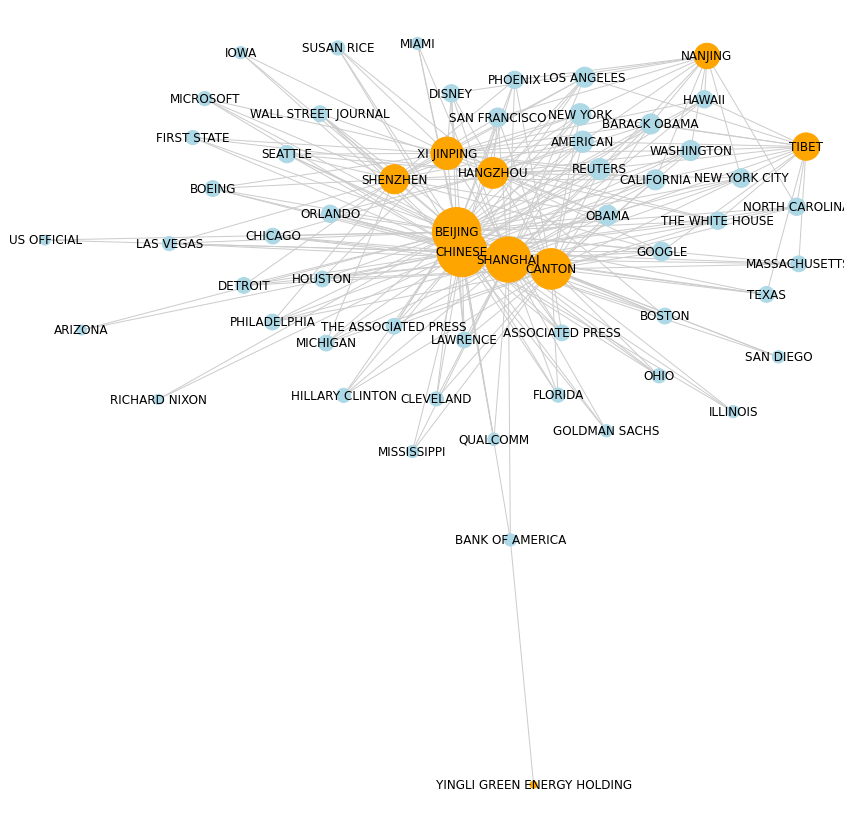

In [16]:
plt.figure(figsize=(15, 15))

# Create a layout for our nodes 
layout = nx.spring_layout(g1, iterations = 500)

size1 = [g1.degree(a)*50 for a in A1]
nx.draw_networkx_nodes(g1, layout, nodelist = A1, node_size = size1, node_color = 'orange')

# Draw EVERYONE
size2 = [g1.degree(a)*50 for a in alist]
nx.draw_networkx_nodes(g1, layout, nodelist = alist, node_color = 'lightblue', node_size = size2)

nx.draw_networkx_edges(g1, layout, width = 1, edge_color = "#cccccc")

node_labels = dict(zip(A1 + alist, A1 + alist))
nx.draw_networkx_labels(g1, layout, labels = node_labels)

plt.axis('off')
plt.savefig('/home/hadoop/FinalProject/CHNnetworking.png')
plt.show()

In [17]:
# take columns of Actor1Name and Actor2Name, and drop null values
ddf2 = df.iloc[:,[6, 7, 16, 17]]
ddf2 = ddf2[(ddf2.Actor1Name != "CHINA") & (ddf2.Actor1Name != "") & (ddf2.Actor1Name != "THE US") & (ddf2.Actor1Name != "UNITED STATES") & (ddf2.Actor2Name != "UNITED STATES") & (ddf2.Actor2Name != "") & \
            (ddf2.Actor2Name != "CHINA") & (ddf2.Actor1CountryCode == "USA") & (ddf2.Actor2CountryCode == "CHN")]
ddf2.head()

,Actor1Name,Actor1CountryCode,Actor2Name,Actor2CountryCode
7073,MICROSOFT,USA,CHINESE,CHN
7074,MICROSOFT,USA,CHINESE,CHN
7075,MICROSOFT,USA,CHINESE,CHN
7586,LOS ANGELES,USA,CHINESE,CHN
12080,WASHINGTON,USA,BEIJING,CHN


In [18]:
ddf2.Actor1Name.value_counts().head(10)

WASHINGTON      2835
OBAMA           2454
AMERICAN        2267
BARACK OBAMA    1541
NEW YORK        1160
REUTERS         1139
GOOGLE           424
CALIFORNIA       386
BOEING           368
LOS ANGELES      341
Name: Actor1Name, dtype: int64

In [19]:
# Make a list of top 10 ActorName
A2 = ['WASHINGTON', 'OBAMA', 'AMERICAN', 'BARACK OBAMA', 'NEW YORK', 'REUTERS', 'GOOGLE', 'CALIFORNIA', 'BOEING', 'LOS ANGELES']

In [20]:
pddf2 = ddf2[(ddf2.Actor1Name == 'WASHINGTON') | (ddf2.Actor1Name == 'OBAMA') | (ddf2.Actor1Name == 'AMERICAN') | (ddf2.Actor1Name == 'BARACK OBAMA') | \
             (ddf2.Actor1Name == 'NEW YORK') | (ddf2.Actor1Name == 'REUTERS') | (ddf2.Actor1Name == 'GOOGLE') | (ddf2.Actor1Name == 'CALIFORNIA') | \
             (ddf2.Actor1Name == 'BOEING') | (ddf2.Actor1Name == 'LOS ANGELES')]

In [21]:
b = pddf2.Actor2Name.value_counts().head(50).axes
blist = []
for i in range(50):
    blist.append(b[0][i])
blist

['CHINESE',
 'BEIJING',
 'XI JINPING',
 'HANGZHOU',
 'SHANGHAI',
 'TIBET',
 'CANTON',
 'SHENZHEN',
 'HU JINTAO',
 'LI KEQIANG',
 'XIAMEN',
 'GREAT WALL',
 'GUANGZHOU',
 'NANJING',
 'DALIAN',
 'YANG JIECHI',
 'ZHEJIANG',
 'CHONGQING',
 'BANK OF CHINA',
 'KUNMING',
 'FUJIAN',
 'TIANJIN',
 'SICHUAN',
 'QINGDAO',
 'JIANGSU',
 'CHINA SOUTHERN AIRLINES',
 'CHENGDU',
 'GREAT WALL OF CHINA',
 'HARBIN',
 'XINJIANG',
 'INNER MONGOLIA',
 'GRAND CANAL',
 'LIAONING',
 'HUNAN',
 'AGRICULTURAL BANK OF CHINA',
 'HAIKOU',
 'ZHOU XIAOCHUAN',
 'GUIZHOU',
 'XIAN',
 'SHANXI',
 'FUZHOU',
 'MANCHURIA',
 'MA KAI',
 'LI BAODONG',
 'GUANGDONG',
 'ZHUHAI',
 'STEPHEN LAM',
 'CHINA LIFE INSURANCE COMPANY',
 'ZHENGZHOU',
 'SHANDONG']

In [22]:
UC = pddf2[(pddf2.Actor2Name == 'CHINESE') | (pddf2.Actor2Name == 'BEIJING') | (pddf2.Actor2Name == 'XI JINPING') | (pddf2.Actor2Name == 'HANGZHOU') | (pddf2.Actor2Name == 'SHANGHAI') | \
           (pddf2.Actor2Name == 'TIBET') | (pddf2.Actor2Name == 'CANTON') | (pddf2.Actor2Name == 'SHENZHEN') | (pddf2.Actor2Name == 'HU JINTAO') | (pddf2.Actor2Name == 'LI KEQIANG') | \
           (pddf2.Actor2Name == 'XIAMEN') | (pddf2.Actor2Name == 'GREAT WALL') | (pddf2.Actor2Name == 'GUANGZHOU') | (pddf2.Actor2Name == 'NANJING') | (pddf2.Actor2Name == 'DALIAN') | \
           (pddf2.Actor2Name == 'YANG JIECHI') | (pddf2.Actor2Name == 'ZHEJIANG') | (pddf2.Actor2Name == 'CHONGQING') | (pddf2.Actor2Name == 'BANK OF CHINA') | \
           (pddf2.Actor2Name == 'KUNMING') | (pddf2.Actor2Name == 'FUJIAN') | (pddf2.Actor2Name == 'TIANJIN') | (pddf2.Actor2Name == 'SICHUAN') | (pddf2.Actor2Name == 'QINGDAO') | \
           (pddf2.Actor2Name == 'JIANGSU') | (pddf2.Actor2Name == 'CHINA SOUTHERN AIRLINES') | (pddf2.Actor2Name == 'CHENGDU') | (pddf2.Actor2Name == 'GREAT WALL OF CHINA') | \
           (pddf2.Actor2Name == 'HARBIN') | (pddf2.Actor2Name == 'XINJIANG') | (pddf2.Actor2Name == 'INNER MONGOLIA') | (pddf2.Actor2Name == 'GRAND CANAL') | \
           (pddf2.Actor2Name == 'LIAONING') | (pddf2.Actor2Name == 'HUNAN') | (pddf2.Actor2Name == 'AGRICULTURAL BANK OF CHINA') | (pddf2.Actor2Name == 'HAIKOU') | \
           (pddf2.Actor2Name == 'ZHOU XIAOCHUAN') | (pddf2.Actor2Name == 'GUIZHOU') | (pddf2.Actor2Name == 'XIAN') | (pddf2.Actor2Name == 'SHANXI') | (pddf2.Actor2Name == 'FUZHOU') | \
           (pddf2.Actor2Name == 'MANCHURIA') | (pddf2.Actor2Name == 'MA KAI') | (pddf2.Actor2Name == 'LI BAODONG') | (pddf2.Actor2Name == 'GUANGDONG') | (pddf2.Actor2Name == 'ZHUHAI') | \
           (pddf2.Actor2Name == 'STEPHEN LAM') | (pddf2.Actor2Name == 'CHINA LIFE INSURANCE COMPANY') | (pddf2.Actor2Name == 'ZHENGZHOU') | (pddf2.Actor2Name == 'SHANDONG')]
UC.head()

,Actor1Name,Actor1CountryCode,Actor2Name,Actor2CountryCode
7586,LOS ANGELES,USA,CHINESE,CHN
12080,WASHINGTON,USA,BEIJING,CHN
12081,WASHINGTON,USA,BEIJING,CHN
14258,WASHINGTON,USA,BEIJING,CHN
38292,OBAMA,USA,CHINESE,CHN


In [23]:
# Create the graph
g2 = nx.from_pandas_edgelist(UC, source = 'Actor1Name', target = 'Actor2Name')  

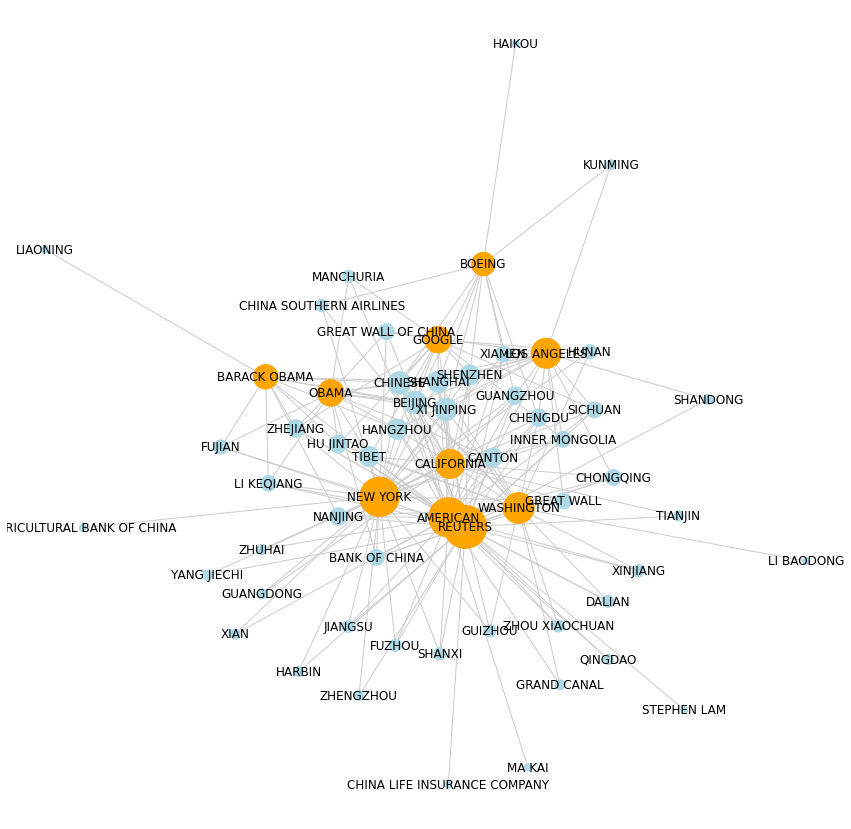

In [24]:
plt.figure(figsize=(15, 15))

# Create a layout for our nodes 
layout = nx.spring_layout(g2, iterations = 500)

size1 = [g2.degree(a)*50 for a in A2]
nx.draw_networkx_nodes(g2, layout, nodelist = A2, node_size = size1, node_color = 'orange')

# Draw EVERYONE
size2 = [g2.degree(a)*50 for a in blist]
nx.draw_networkx_nodes(g2, layout, nodelist = blist, node_color = 'lightblue', node_size = size2)

nx.draw_networkx_edges(g2, layout, width = 1, edge_color = "#cccccc")

node_labels = dict(zip(A2 + blist, A2 + blist))
nx.draw_networkx_labels(g2, layout, labels = node_labels)

plt.axis('off')
plt.savefig('/home/hadoop/FinalProject/USAnetworking.png')
plt.show()

Network about QuadClass

In [25]:
ddf3 = df.iloc[:,[6, 7, 29]]
ddf3 = ddf3[(ddf3.Actor1Name != "") & (ddf3.QuadClass != "") & (ddf3.Actor1CountryCode == 'CHN')]
ddf3

,Actor1Name,Actor1CountryCode,QuadClass
npartitions=610,,,
,object,object,object
,...,...,...
...,...,...,...
,...,...,...
,...,...,...


In [26]:
#1=Verbal Cooperation, 2=Material Cooperation, 3=Verbal Conflict, 4=Material Conflict
A3 = ['1', '2', '3', '4']

In [27]:
c = ddf3.Actor1Name.value_counts().head(50).axes
clist = []
for i in range(50):
    clist.append(c[0][i])
clist

['CHINA',
 'CHINESE',
 'BEIJING',
 'XI JINPING',
 'SHANGHAI',
 'CANTON',
 'LI KEQIANG',
 'HANGZHOU',
 'TIBET',
 'SHENZHEN',
 'GUANGZHOU',
 'BANK OF CHINA',
 'GUANGDONG',
 'CHENGDU',
 'XINJIANG',
 'TIANJIN',
 'NANJING',
 'SICHUAN',
 'ZHANG DEJIANG',
 'SIAN',
 'CHONGQING',
 'ZHEJIANG',
 'YANG JIECHI',
 'SHANDONG',
 'GREAT WALL',
 'KUNMING',
 'QINGDAO',
 'XIAMEN',
 'XIAN',
 'HEBEI',
 'YUNNAN',
 'WUHAN',
 'HARBIN',
 'YINGLI GREEN ENERGY HOLDING',
 'CHINA MOBILE',
 'JIANGSU',
 'DALIAN',
 'HUNAN',
 'LIAONING',
 'FUJIAN',
 'PEARL RIVER',
 'HU JINTAO',
 'GUIZHOU',
 'ANHUI',
 'HENAN',
 'INNER MONGOLIA',
 'ZHENGZHOU',
 'SHAANXI',
 'SHENYANG',
 'SHANXI']

In [28]:
QC = ddf3[(ddf3.Actor1Name == 'CHINA') | (ddf3.Actor1Name == 'CHINESE') | (ddf3.Actor1Name == 'BEIJING') | (ddf3.Actor1Name == 'XI JINPING') | (ddf3.Actor1Name == 'SHANGHAI') | \
          (ddf3.Actor1Name == 'CANTON') | (ddf3.Actor1Name == 'LI KEQIANG') | (ddf3.Actor1Name == 'HANGZHOU') | (ddf3.Actor1Name == 'TIBET') | (ddf3.Actor1Name == 'SHENZHEN') | \
          (ddf3.Actor1Name == 'GUANGZHOU') | (ddf3.Actor1Name == 'BANK OF CHINA') | (ddf3.Actor1Name == 'GUANGDONG') | (ddf3.Actor1Name == 'CHENGDU') | (ddf3.Actor1Name == 'XINJIANG') | \
          (ddf3.Actor1Name == 'TIANJIN') | (ddf3.Actor1Name == 'NANJING') | (ddf3.Actor1Name == 'SICHUAN') | (ddf3.Actor1Name == 'ZHANG DEJIANG') | (ddf3.Actor1Name == 'SIAN') | \
          (ddf3.Actor1Name == 'CHONGQING') | (ddf3.Actor1Name == 'ZHEJIANG') | (ddf3.Actor1Name == 'YANG JIECHI') | (ddf3.Actor1Name == 'SHANDONG') | (ddf3.Actor1Name == 'GREAT WALL') | \
          (ddf3.Actor1Name == 'KUNMING') | (ddf3.Actor1Name == 'QINGDAO') | (ddf3.Actor1Name == 'XIAMEN') | (ddf3.Actor1Name == 'XIAN') | (ddf3.Actor1Name == 'HEBEI') | \
          (ddf3.Actor1Name == 'YUNNAN') | (ddf3.Actor1Name == 'WUHAN') | (ddf3.Actor1Name == 'HARBIN') | (ddf3.Actor1Name == 'YINGLI GREEN ENERGY HOLDING') | \
          (ddf3.Actor1Name == 'CHINA MOBILE') | (ddf3.Actor1Name == 'JIANGSU') | (ddf3.Actor1Name == 'DALIAN') | (ddf3.Actor1Name == 'HUNAN') | (ddf3.Actor1Name == 'LIAONING') | \
          (ddf3.Actor1Name == 'FUJIAN') | (ddf3.Actor1Name == 'PEARL RIVER') | (ddf3.Actor1Name == 'HU JINTAO') | (ddf3.Actor1Name == 'GUIZHOU') | (ddf3.Actor1Name == 'ANHUI') | \
          (ddf3.Actor1Name == 'HENAN') | (ddf3.Actor1Name == 'INNER MONGOLIA') | (ddf3.Actor1Name == 'ZHENGZHOU') | (ddf3.Actor1Name == 'SHAANXI') | (ddf3.Actor1Name == 'SHENYANG') | \
          (ddf3.Actor1Name == 'SHANXI')]
QC.head()

,Actor1Name,Actor1CountryCode,QuadClass
712,CHINA,CHN,1
713,CHINA,CHN,1
714,CHINA,CHN,1
715,CHINA,CHN,1
716,CHINA,CHN,1


In [29]:
# Create the graph
g3 = nx.from_pandas_edgelist(QC, source = 'QuadClass', target = 'Actor1Name')  

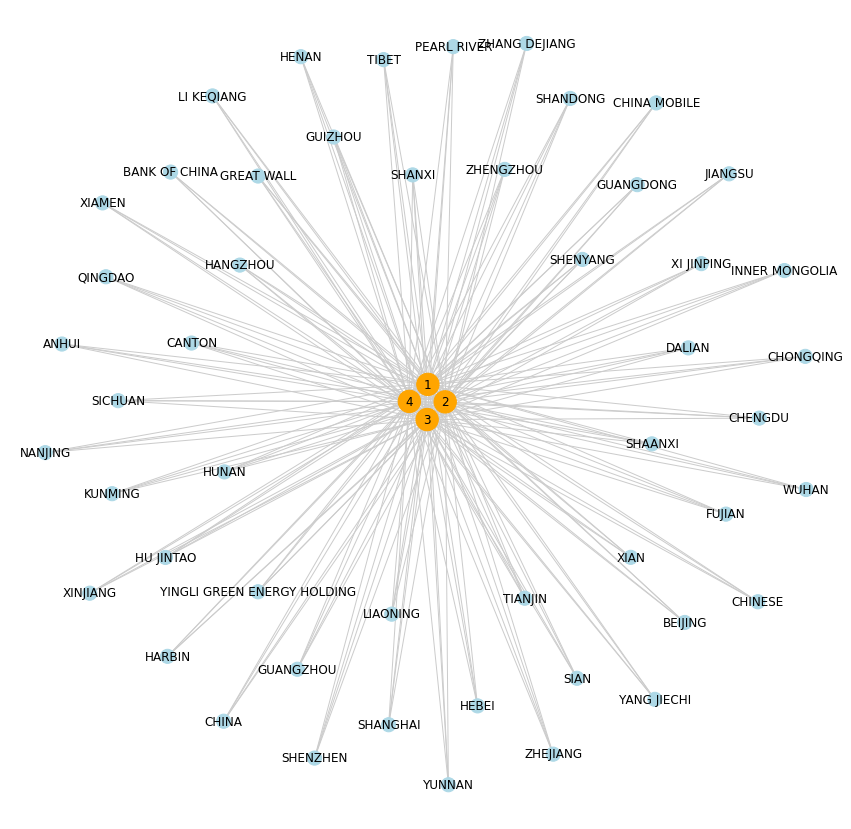

In [30]:
plt.figure(figsize=(15, 15))

# Create a layout for our nodes 
layout = nx.spring_layout(g3, iterations = 50)

size1 = [g3.degree(a)*10 for a in A3]
nx.draw_networkx_nodes(g3, layout, nodelist = A3, node_size = size1, node_color = 'orange')

# Draw EVERYONE
size2 = [g3.degree(a)*50 for a in clist]
nx.draw_networkx_nodes(g3, layout, nodelist = clist, node_color = 'lightblue', node_size = size2)

nx.draw_networkx_edges(g3, layout, width = 1, edge_color = "#cccccc")

node_labels = dict(zip(A3 + clist, A3 + clist))
nx.draw_networkx_labels(g3, layout, labels = node_labels)

plt.axis('off')
plt.savefig('/home/hadoop/FinalProject/QuadClassCHN.png')
plt.show()

In [31]:
ddf4 = df.iloc[:,[6, 7, 29]]
ddf4 = ddf4[(ddf4.Actor1Name != "") & (ddf4.QuadClass != "") & (ddf4.Actor1CountryCode == 'USA')]
ddf4

,Actor1Name,Actor1CountryCode,QuadClass
npartitions=610,,,
,object,object,object
,...,...,...
...,...,...,...
,...,...,...
,...,...,...


In [32]:
d = ddf4.Actor1Name.value_counts().head(50).axes
dlist = []
for i in range(50):
    dlist.append(d[0][i])
dlist

['UNITED STATES',
 'OBAMA',
 'AMERICAN',
 'THE US',
 'WASHINGTON',
 'NEW YORK',
 'HILLARY CLINTON',
 'CALIFORNIA',
 'TEXAS',
 'FLORIDA',
 'BARACK OBAMA',
 'GOOGLE',
 'ASSOCIATED PRESS',
 'REUTERS',
 'OHIO',
 'CHICAGO',
 'THE WHITE HOUSE',
 'LOS ANGELES',
 'THE ASSOCIATED PRESS',
 'IOWA',
 'MICHIGAN',
 'VIRGINIA',
 'PENNSYLVANIA',
 'COLORADO',
 'ILLINOIS',
 'INDIANA',
 'BOSTON',
 'ARIZONA',
 'WISCONSIN',
 'DALLAS',
 'ORLANDO',
 'NORTH CAROLINA',
 'NEW JERSEY',
 'MIAMI',
 'SAN FRANCISCO',
 'OREGON',
 'PHILADELPHIA',
 'MICROSOFT',
 'MASSACHUSETTS',
 'MINNESOTA',
 'NASA',
 'MISSOURI',
 'VERMONT',
 'HOUSTON',
 'BILL CLINTON',
 'UTAH',
 'ALABAMA',
 'SOUTH CAROLINA',
 'KANSAS',
 'LOUISIANA']

In [33]:
QU = ddf4[(ddf4.Actor1Name == 'UNITED STATES') | (ddf4.Actor1Name == 'OBAMA') | (ddf4.Actor1Name == 'AMERICAN') | (ddf4.Actor1Name == 'THE US') | (ddf4.Actor1Name == 'WASHINGTON') | \
          (ddf4.Actor1Name == 'NEW YORK') | (ddf4.Actor1Name == 'HILLARY CLINTON') | (ddf4.Actor1Name == 'CALIFORNIA') | (ddf4.Actor1Name == 'TEXAS') | (ddf4.Actor1Name == 'FLORIDA') | \
          (ddf4.Actor1Name == 'BARACK OBAMA') | (ddf4.Actor1Name == 'GOOGLE') | (ddf4.Actor1Name == 'ASSOCIATED PRESS') | (ddf4.Actor1Name == 'REUTERS') | (ddf4.Actor1Name == 'OHIO') | \
          (ddf4.Actor1Name == 'CHICAGO') | (ddf4.Actor1Name == 'THE WHITE HOUSE') | (ddf4.Actor1Name == 'LOS ANGELES') | (ddf4.Actor1Name == 'THE ASSOCIATED PRESS') | \
          (ddf4.Actor1Name == 'IOWA') | (ddf4.Actor1Name == 'MICHIGAN') | (ddf4.Actor1Name == 'VIRGINIA') | (ddf4.Actor1Name == 'PENNSYLVANIA') | (ddf4.Actor1Name == 'COLORADO') | \
          (ddf4.Actor1Name == 'ILLINOIS') | (ddf4.Actor1Name == 'INDIANA') | (ddf4.Actor1Name == 'BOSTON') | (ddf4.Actor1Name == 'ARIZONA') | (ddf4.Actor1Name == 'WISCONSIN') | \
          (ddf4.Actor1Name == 'DALLAS') | (ddf4.Actor1Name == 'ORLANDO') | (ddf4.Actor1Name == 'NORTH CAROLINA') | (ddf4.Actor1Name == 'NEW JERSEY') | (ddf4.Actor1Name == 'MIAMI') | \
          (ddf4.Actor1Name == 'SAN FRANCISCO') | (ddf4.Actor1Name == 'OREGON') | (ddf4.Actor1Name == 'PHILADELPHIA') | (ddf4.Actor1Name == 'MICROSOFT') | \
          (ddf4.Actor1Name == 'MASSACHUSETTS') | (ddf4.Actor1Name == 'MINNESOTA') | (ddf4.Actor1Name == 'NASA') | (ddf4.Actor1Name == 'MISSOURI') | (ddf4.Actor1Name == 'VERMONT') | \
          (ddf4.Actor1Name == 'HOUSTON') | (ddf4.Actor1Name == 'BILL CLINTON') | (ddf4.Actor1Name == 'UTAH') | (ddf4.Actor1Name == 'ALABAMA') | (ddf4.Actor1Name == 'SOUTH CAROLINA') | \
          (ddf4.Actor1Name == 'KANSAS') | (ddf4.Actor1Name == 'LOUISIANA')]
QU.head()

,Actor1Name,Actor1CountryCode,QuadClass
20,UNITED STATES,USA,4
27,UNITED STATES,USA,1
29,OREGON,USA,4
30,OREGON,USA,4
48,ALABAMA,USA,1


In [34]:
# Create the graph
g4 = nx.from_pandas_edgelist(QU, source = 'QuadClass', target = 'Actor1Name') 

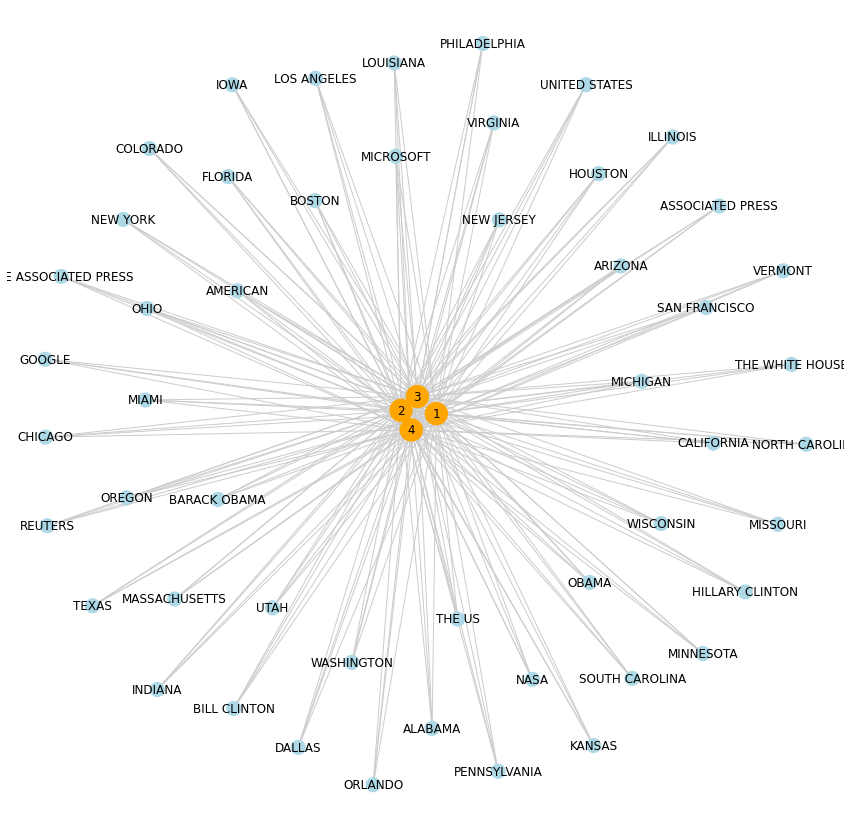

In [35]:
plt.figure(figsize=(15, 15))

# Create a layout for our nodes 
layout = nx.spring_layout(g4, iterations = 50)

size1 = [g4.degree(a)*10 for a in A3]
nx.draw_networkx_nodes(g4, layout, nodelist = A3, node_size = size1, node_color = 'orange')

# Draw EVERYONE
size2 = [g4.degree(a)*50 for a in dlist]
nx.draw_networkx_nodes(g4, layout, nodelist = dlist, node_color = 'lightblue', node_size = size2)

nx.draw_networkx_edges(g4, layout, width = 1, edge_color = "#cccccc")

node_labels = dict(zip(A3 + dlist, A3 + dlist))
nx.draw_networkx_labels(g4, layout, labels = node_labels)

plt.axis('off')
plt.savefig('/home/hadoop/FinalProject/QuadClassUSA.png')
plt.show()